In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np

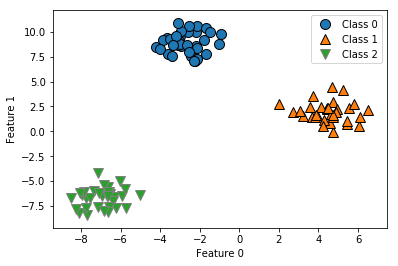

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [3]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [4]:
# クラス分類器それぞれの係数を見てみる（各列は個々の特徴量に対しての係数が格納されている）
print(linear_svm.coef_)

[[-0.17492009  0.23140277]
 [ 0.47621943 -0.06937405]
 [-0.18914076 -0.20400586]]


In [5]:
# クラス分類器それぞれの切片を見てみる
print(linear_svm.intercept_)

[-1.07745524  0.13140706 -0.08604968]


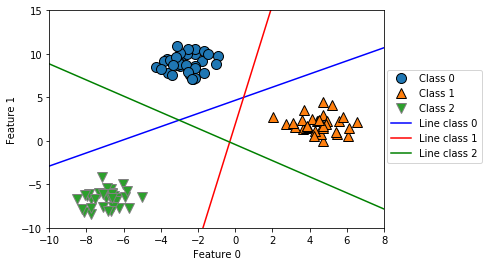

In [6]:
# クラス分類器をそれぞれ可視化してみる

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

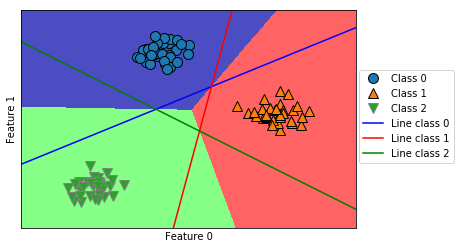

In [7]:
# 中央の三角形部分は3つの分類器全てが「自分のクラスでない」と分類するが、
# そういう時は、その点に最も近い線のクラス（クラス分類式の値が一番大きいクラス）に分類するのがよい。

# ２次元空間全ての点に対する予測を描画する
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [8]:
'''
ナイーブベイズクラス分類器
・線形モデルに似ているが、線形モデルよりも高速
・汎化性能は線形モデルよりもわずかに劣る
・scikit-learnには３種のナイーブベイズクラス分類器が実装されている

GaussianNB
・連続値データに適用する

BernoulliNB
・2値データ（ゼロかイチか）に適用する
・ほとんどの場合クラス分類に用いられる

MultinomialNB
・カウントデータに適用する
・ほとんどの場合クラス分類に用いられる
'''

# BernoulliNBは個々のクラス（行をゼロイチでグルーピングしたもの）に対して、特徴量（列）ごとに非ゼロである場合をカウントする

X = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 0, 0, 1],
    [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
